<a href="https://colab.research.google.com/github/isaiasgj0002/ejerciciosIA/blob/main/AprendizajeNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [2]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
dataframe = pd.DataFrame([('juanperez02', '180','160','99','2'),
                   ('josepertez81', '70','90','89','4'),
                   ('mariajula81', '100','82','41','4'),
                   ('liligs81', '80','40','102','2'),
                   ('augu91', '71','46','90','4')],
           columns=('usuario', 'cp','cc','cs','categoria')
                 )
dataframe.head()
dataframe.describe()
print(dataframe.groupby('categoria').size())

categoria
2    2
4    3
dtype: int64


In [4]:
dataframe['cp']=dataframe['cp'].astype(float)
dataframe['cc']=dataframe['cc'].astype(float)
dataframe['cs']=dataframe['cs'].astype(float)
dataframe['categoria']=dataframe['categoria'].astype(float)

<ipython-input-5-20defdcd68fe>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataframe.drop(['categoria'],1).hist()


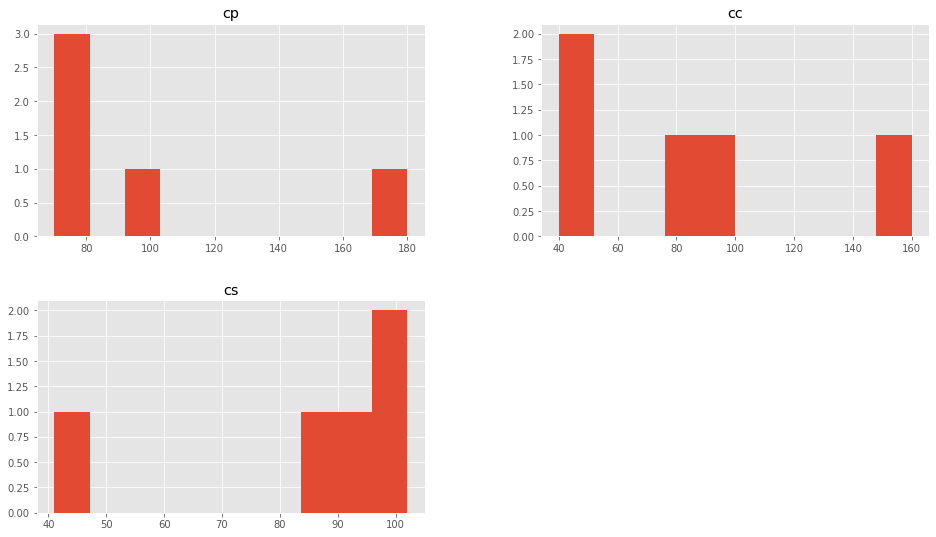

In [5]:
dataframe.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


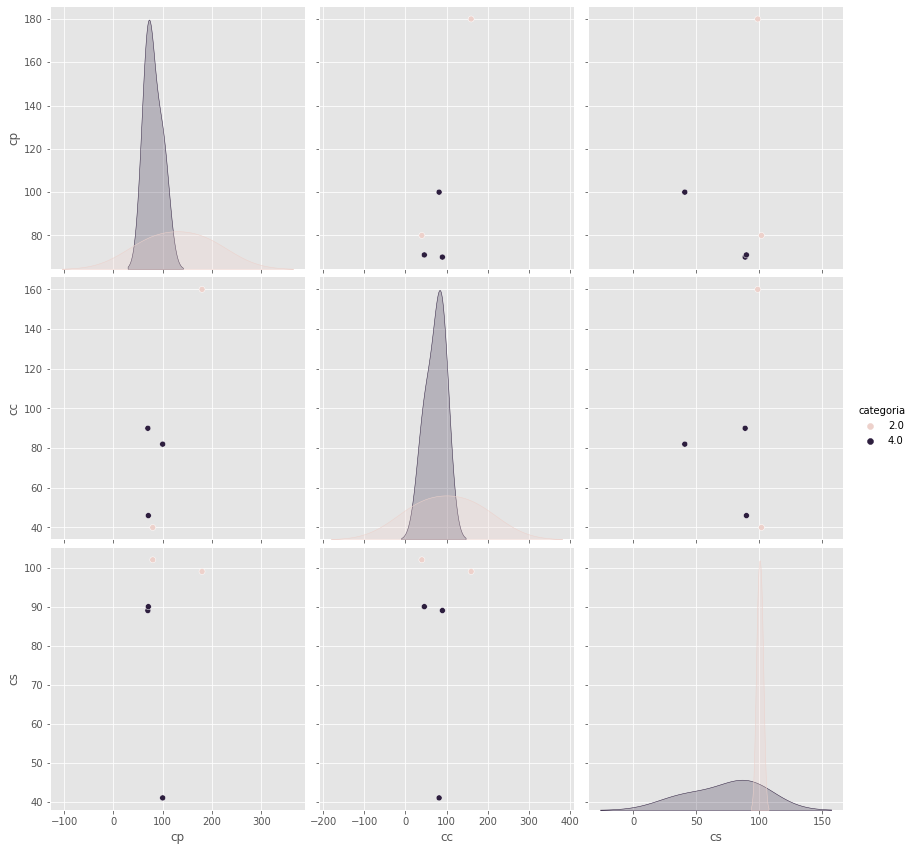

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["cp","cc","cs"],kind='scatter')
plt.show()

In [7]:
X = np.array(dataframe[["cp","cc","cs"]])
y = np.array(dataframe['categoria'])
X.shape

(5, 3)

In [10]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 70.  90.  89.]
 [180. 160.  99.]
 [ 71.  46.  90.]
 [100.  82.  41.]
 [ 80.  40. 102.]]


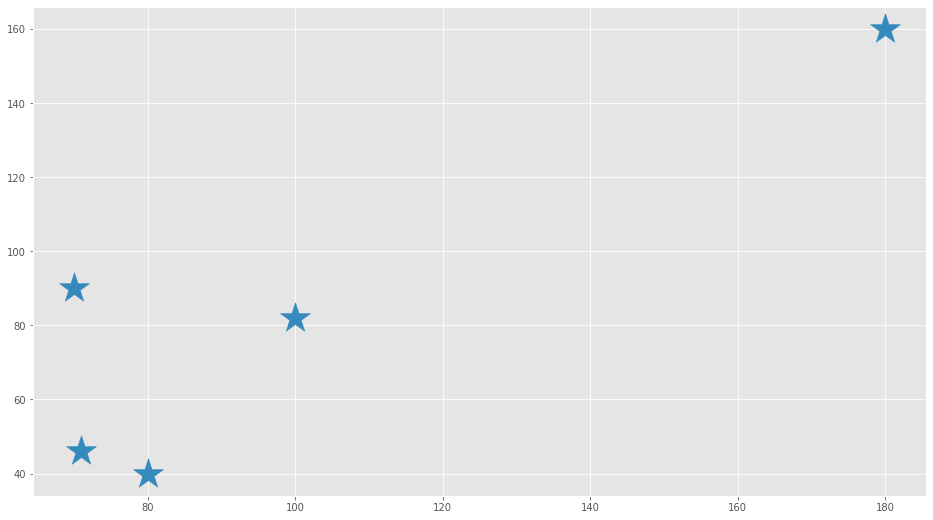

In [11]:
f1 = dataframe['cp'].values
f2 = dataframe['cc'].values
C = kmeans.cluster_centers_
plt.scatter(f1, f2, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', s=1000)
plt.show()